R² Score: 0.40121737554812


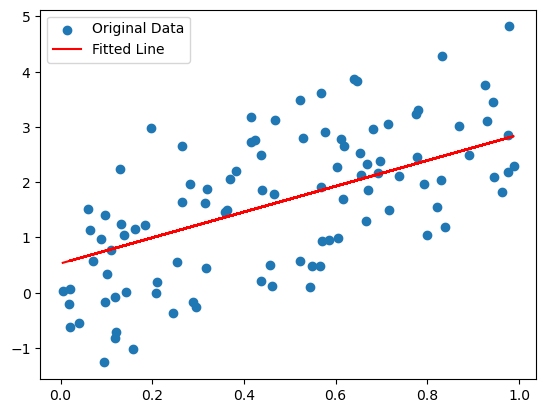

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate dummy data
np.random.seed(0)
x = np.random.rand(100, 1)
y = 3 * x.squeeze() + np.random.randn(100) * 1  # y = 3x + 2 + noise

# Convert to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Define a simple linear regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # One input, one output

    def forward(self, x):
        return self.linear(x)

# Initialize the model, define loss function and optimizer
model = LinearRegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training the model
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()

# Evaluate the model
model.eval()
predicted = model(x_tensor).detach().numpy()

# Calculate R² Score
ss_res = np.sum((y - predicted.squeeze()) ** 2) # ss_res is the sum of squared residuals
ss_tot = np.sum((y - np.mean(y)) ** 2) # ss_tot is the total sum of squares
r2_score = 1 - (ss_res / ss_tot)

print(f'R² Score: {r2_score}')

# Plot the results
plt.scatter(x, y, label='Original Data')
plt.plot(x, predicted, label='Fitted Line', color='r')
plt.legend()
plt.show()


In [26]:
# firts lets squeeze x
x = x.squeeze()
y = y.squeeze()

# now lets do AND_i x_i < y_i
#

In [23]:
result

array([0.9517135 , 0.97126438, 0.96274825, 0.94960442, 0.95239921,
       0.97015322, 0.95225927, 0.97736922, 0.97854796, 0.94646145,
       0.97189041, 0.96007598, 0.95918039, 0.98108785, 0.89822981,
       0.90421109, 0.88508458, 0.97903733, 0.97258867, 0.97769143,
       0.98441213, 0.96963241, 0.94245442, 0.97486403, 0.89275885,
       0.96994482, 0.90424822, 0.97842887, 0.96216644, 0.95154149,
       0.93795646, 0.97439607, 0.94407415, 0.96537278, 0.88192419,
       0.9649573 , 0.96507209, 0.96151964, 0.98108872, 0.96940546,
       0.94028829, 0.94070607, 0.96847941, 0.9049167 , 0.96317566,
       0.96532053, 0.91507595, 0.92003178, 0.93691362, 0.94093123,
       0.95535761, 0.94936393, 0.98034002, 0.9009007 , 0.91326502,
       0.91608174, 0.96655629, 0.92313702, 0.95130333, 0.91525415,
       0.89741378, 0.90591011, 0.96542129, 0.91212559, 0.93286025,
       0.9443754 , 0.97209653, 0.90936484, 0.97192227, 0.895298  ,
       0.98103652, 0.9572476 , 0.9797481 , 0.95799473, 0.96978

In [28]:
z[z<0]

array([-0.06752283, -0.44647732, -0.34752627, -0.93657455, -0.12691241,
       -0.23042377, -0.22533688, -0.01438843, -0.21809257, -0.60421032,
       -1.17331843, -0.26938779, -0.5851027 , -0.83953839, -0.55518826,
       -0.20036461, -0.09223261, -1.35689008, -0.45543066, -0.64933469])

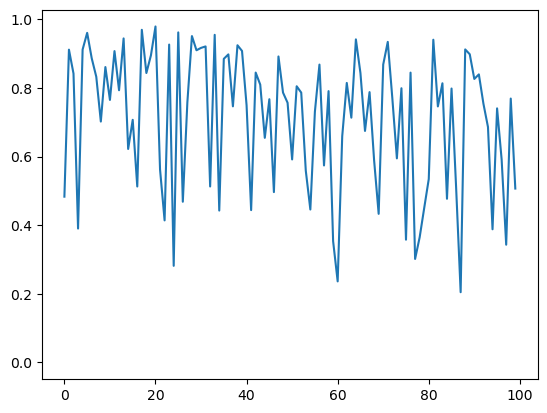

In [30]:
import numpy as np

# Assuming x and y are numpy arrays
z = y - x  # difference between y and x

# Apply sigmoid function to approximate AND operation
result = 1 / (1 + np.exp(-z))
plt.plot(result)

# If you want the result to be 1 if all x_i < y_i and 0 otherwise
final_result = np.prod(result)
plt.plot(final_result)